<a href="https://colab.research.google.com/github/Hendman/Data-Science-Analytics/blob/main/GWP_1_M3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FINANCIAL DATA
---
##MODULE 3 | GROUP WORK PROJECT 1
---

###**Importing Libraries**

In [ ]:
# importing libraries
!pip install quandl

import quandl
import datetime
from datetime import date
import pandas as pd
import numpy as np
import seaborn as sns
import math as mt
import pandas_datareader.data as web
from matplotlib import pyplot as plt
import yfinance as yf
from scipy.stats import describe
from scipy.stats import norm

yf.pdr_override()
%matplotlib inline

###**Step 4: Getting the Data**

####**Money at a fixed rate for an unsecured purchase (e.g. credit card) for an individual**

In [ ]:
#Free API key
quandl.ApiConfig.api_key = "gLaZFxKEo11zxBpDXfJ-" #my free api
#Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (CCLACBW027SBOG)
#Billions of US Dollars
credit_card_balances = quandl.get("FRED/CCLACBW027SBOG").rename(columns = {"Value":"Balance"})

#Delinquency Rate on Credit Card Loans, All Commercial Banks (DRCCLACBS)
#Percentage
deliquency_rates = quandl.get("FRED/DRCCLACBS").rename(columns = {"Value":"Deliquency Rate"})

#Commercial Bank Interest Rate on Credit Card Plans, All Accounts
#Percentage
interest_rates = quandl.get("FRED/TERMCBCCALLNS").rename(columns = {"Value":"Interest Rate"})

In [ ]:
#Shape and DataFrame
print(f"Size: {credit_card_balances.shape}\n")
credit_card_balances.head()

Size: (1128, 1)



,Balance
Date,
2000-06-28,211.4984
2000-07-05,212.0107
2000-07-12,210.8742
2000-07-19,212.5366
2000-07-26,211.7764


In [ ]:
#Shape and DataFrame
print(f"Size: {deliquency_rates.shape}\n")
deliquency_rates.head()

Size: (123, 1)



,Deliquency Rate
Date,
1991-01-01,5.26
1991-04-01,5.48
1991-07-01,5.35
1991-10-01,5.32
1992-01-01,5.27


In [ ]:

#Shape and DataFrame
print(f"Size: {interest_rates.shape}\n")
interest_rates.head()

Size: (109, 1)



,Interest Rate
Date,
1994-11-01,15.69
1995-02-01,16.10
1995-05-01,16.14
1995-08-01,15.92
1995-11-01,15.81


####**Publicly traded Equity (e.g. common stock) – that is, securities lending of a stock.**

In [ ]:
#10 years period stock data
end = datetime.date(2024, 1, 9) #My birthday 😊
start = end - datetime.timedelta(10*365) #10 years period
#Adj Close stock price
stock_AClose = web.DataReader(["AAPL","MSFT","TSLA","NVDA","AMZN"], start, end)["Adj Close"]
stock_AClose=stock_AClose.rename(columns={"AAPL":"AAPL AClose", "AMZN":"AMZN AClose", "MSFT":"MSFT AClose", "NVDA":"NVDA AClose", "TSLA":"TSLA AClose"})
#Stock volume
stock_volume = web.DataReader(["AAPL","MSFT","TSLA","NVDA","AMZN"], start, end)["Volume"]
stock_volume=stock_volume.rename(columns={"AAPL":"AAPL volume", "AMZN":"AMZN volume", "MSFT":"MSFT volume", "NVDA":"NVDA volume", "TSLA":"TSLA volume"})

[*********************100%%**********************]  5 of 5 completed
[*********************100%%**********************]  5 of 5 completed


In [ ]:
print(f"Size: {stock_AClose.shape}\n")
stock_AClose.head()

Size: (2514, 5)



,AAPL AClose,AMZN AClose,MSFT AClose,NVDA AClose,TSLA AClose
Date,,,,,
2014-01-13,16.773926,19.549000,29.455141,3.622794,9.289333
2014-01-14,17.107704,19.877001,30.128788,3.736006,10.751333
2014-01-15,17.451172,19.793501,30.953997,3.776101,10.942000
2014-01-16,17.353800,19.790001,31.063463,3.787894,11.398000
2014-01-17,16.928602,19.980499,30.634014,3.771384,11.334000


In [ ]:
print(f"Size: {stock_volume.shape}\n")
stock_volume.head()

Size: (2514, 5)



,AAPL volume,AMZN volume,MSFT volume,NVDA volume,TSLA volume
Date,,,,,
2014-01-13,378492800,56898000,45901900,24333200,94741500
2014-01-14,332561600,46802000,41623300,24182800,414105000
2014-01-15,391638800,53566000,44812600,17504400,306984000
2014-01-16,229278000,52024000,38018700,22065200,179391000
2014-01-17,426739600,90102000,46267500,34040000,138093000


####**Money at a floating rate for a secured purchase (e.g. home or automobile) for an individual.**

In [ ]:
#FED monthly Interest rates

interest_rate_symbol = "^IRX"

interest_rate_data = yf.download(interest_rate_symbol, start="2000-01-01", end="2023-12-31")


fed_rates_monthly = interest_rate_data['Close'].resample('M').last()

fed_rates_monthly

[*********************100%%**********************]  1 of 1 completed


Date
2000-01-31    5.530
2000-02-29    5.640
2000-03-31    5.720
2000-04-30    5.650
2000-05-31    5.490
              ...  
2023-08-31    5.298
2023-09-30    5.300
2023-10-31    5.320
2023-11-30    5.238
2023-12-31    5.180
Freq: M, Name: Close, Length: 288, dtype: float64

In [ ]:
# Zillow House Price Index

estate_prices_df = pd.read_csv('zillow.csv')

estate_prices_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30
0,102001,0,United States,country,NaN,120020.015498,120231.169181,120493.030838,121054.672692,121701.055130,...,335523.211104,335462.315828,336417.300945,338027.272082,339946.048733,341676.927889,343283.109664,344496.587317,345404.638956,346047.922374
1,394913,1,"New York, NY",msa,NY,214225.979996,215136.319540,216055.090469,217916.875892,219844.819171,...,600197.233963,600509.821697,602499.893236,606494.396332,610627.178896,614197.441106,617467.509260,620170.102296,622496.380878,624788.199586
2,753899,2,"Los Angeles, CA",msa,CA,217855.179140,218665.876819,219745.718395,221894.240387,224244.049881,...,846508.441856,836885.357361,834543.158118,838270.596321,845952.780325,856996.305878,870358.019090,883849.276005,895074.115264,903521.426598
3,394463,3,"Chicago, IL",msa,IL,150007.384914,150146.248054,150410.715349,151068.644257,151860.053595,...,287381.365053,288015.005259,289677.781537,291831.474260,294348.608420,296846.465132,299258.235890,301055.802875,302394.134991,303291.027035
4,394514,4,"Dallas, TX",msa,TX,124041.283443,124096.531864,124160.045580,124324.984028,124542.450856,...,365037.736176,363522.308463,362978.402601,363260.365877,364067.268791,365030.865070,365940.117007,366349.463711,366462.390959,366325.569461


In [ ]:
# Zillow House Price Index Nation Wide

usa_prices_series = estate_prices_df.loc[0, estate_prices_df.columns[5:]]
usa_prices_series.index = pd.to_datetime(usa_prices_series.index)
usa_prices_series

2000-01-31    120020.015498
2000-02-29    120231.169181
2000-03-31    120493.030838
2000-04-30    121054.672692
2000-05-31     121701.05513
                  ...      
2023-07-31    341676.927889
2023-08-31    343283.109664
2023-09-30    344496.587317
2023-10-31    345404.638956
2023-11-30    346047.922374
Name: 0, Length: 287, dtype: object

In [ ]:
usa_mortgage_frates = pd.read_csv('MORTGAGE5US_floating.csv')
usa_mortgage_frates.index = pd.to_datetime(usa_mortgage_frates.DATE)
usa_mortgage_frates.drop(['DATE'], inplace=True, axis=1)
usa_mortgage_frates.head()

,MORTGAGE5US
DATE,
2005-01-06,5.03
2005-01-13,5.05
2005-01-20,5.05
2005-01-27,5.02
2005-02-03,5.00


In [ ]:
import quandl


quandl.ApiConfig.api_key = "YLxT87LkqySiysXrLxZz"  # Merna's api key

# US
fred_gdp = quandl.get("FRED/GDP", start_date="2000-01-01", end_date="2024-01-01")
fred_gdp.head()

,Value
Date,
2000-01-01,10002.179
2000-04-01,10247.720
2000-07-01,10318.165
2000-10-01,10435.744
2001-01-01,10470.231


####**Publicly traded bond (e.g. treasury bond, corporate bond) – that is, securities lending of a bond.**

In [ ]:
import quandl


quandl.ApiConfig.api_key = "YLxT87LkqySiysXrLxZz"  # Merna's api key

In [ ]:
fred_gs10 = quandl.get("FRED/GS10", start_date="2000-01-01", end_date="2024-01-01")
fred_gs10.columns = ['10-Year Treasury Constant Maturity Rate']
fred_gs10.head()

,10-Year Treasury Constant Maturity Rate
Date,
2000-01-01,6.66
2000-02-01,6.52
2000-03-01,6.26
2000-04-01,5.99
2000-05-01,6.44


In [ ]:
fred_tb3ms = quandl.get("FRED/TB3MS", start_date="2000-01-01", end_date="2024-01-01")
fred_tb3ms.columns = ['3-Month Treasury Constant Maturity Rate']
fred_tb3ms.head()

,3-Month Treasury Constant Maturity Rate
Date,
2000-01-01,5.32
2000-02-01,5.55
2000-03-01,5.69
2000-04-01,5.66
2000-05-01,5.79


In [ ]:
# Moody's Seasoned Aaa Corporate Bond Yield (AAA)

moodys_fred_df = pd.read_csv('fred_moodys_AAA.csv')
moodys_fred_df.index = pd.to_datetime(moodys_fred_df.DATE)
moodys_fred_df.drop(['DATE'], inplace=True, axis=1)
moodys_fred_df.head()

,AAA
DATE,
1919-01-01,5.35
1919-02-01,5.35
1919-03-01,5.39
1919-04-01,5.44
1919-05-01,5.39


In [ ]:
# Fed Rate

fred_fedfunds = quandl.get("FRED/FEDFUNDS", start_date="2000-01-01", end_date="2024-01-01")
fred_fedfunds.columns = ['Effective Federal Funds Rate']
fred_fedfunds.head()

,Effective Federal Funds Rate
Date,
2000-01-01,5.45
2000-02-01,5.73
2000-03-01,5.85
2000-04-01,6.02
2000-05-01,6.27


In [ ]:
tres_yield = quandl.get("USTREASURY/YIELD", start_date="2000-01-01", end_date="2024-01-01")
tres_yield.head()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
2000-01-03,NaN,NaN,5.48,5.81,6.09,6.38,6.42,6.50,6.65,6.58,6.94,6.61
2000-01-04,NaN,NaN,5.43,5.75,6.00,6.30,6.34,6.40,6.56,6.49,6.84,6.53
2000-01-05,NaN,NaN,5.44,5.74,6.05,6.38,6.43,6.51,6.68,6.62,6.95,6.64
2000-01-06,NaN,NaN,5.41,5.69,6.03,6.35,6.39,6.46,6.63,6.57,6.86,6.58
2000-01-07,NaN,NaN,5.38,5.66,6.00,6.31,6.35,6.42,6.58,6.52,6.82,6.55


In [ ]:
# 10-Year High Quality Market (HQM) Corporate Bond Spot Rate

hqmcv10yr_fred_df = pd.read_csv('HQMCB10YR_fred.csv')
hqmcv10yr_fred_df.index = pd.to_datetime(hqmcv10yr_fred_df.DATE)
hqmcv10yr_fred_df.drop(['DATE'], inplace=True, axis=1)
hqmcv10yr_fred_df.head()

,HQMCB10YR
DATE,
1984-01-01,12.89
1984-02-01,12.73
1984-03-01,13.12
1984-04-01,13.21
1984-05-01,13.59


In [ ]:
# ICE BofA US Corporate Index Option-Adjusted Spread (FRED)

ice_fred_df = pd.read_csv('ice_bofa_fred.csv')
ice_fred_df.index = pd.to_datetime(ice_fred_df.DATE)
ice_fred_df.drop(['DATE'], inplace=True, axis=1)
ice_fred_df['BAMLC0A0CM'] = pd.to_numeric(ice_fred_df['BAMLC0A0CM'], errors='coerce')
ice_fred_df.dropna(inplace=True)
ice_fred_df.head()

,BAMLC0A0CM
DATE,
2000-01-03,1.16
2000-01-04,1.16
2000-01-05,1.18
2000-01-06,1.18
2000-01-07,1.20


#### **Money at a Fixed Rate for a Business for a Construction Loan(Jumbo 30-Year Fixed Mortgage Rates)**

This dataset tracks the average jumbo mortgage rate quoted on Zillow Mortgages for a 30-year, fixed-rate, jumbo mortgage in one-hour increments during business hours. It provides insight into changes in the housing market and helps consumers make wiser decisions with their investments. In addition to tracking monthly mortgage rates, our dataset also covers consumer's home types and housing stock, cash buyer data, Zillow Home Value Forecast (ZHVF), negative equity metrics, affordability forecasts for both mortgages and rents as well as historic data including historical ZHVI and household income. With this unique blend of financial and real estate information, users are empowered to make more informed decisions about their investments. The data is updated weekly with the most recent statistics available so that users always have access to up-to-date information.Source:By Zillow Data [https://data.world/zillow-data/jumbo-30-year-fixed-mortgage-rates]

In [ ]:
Mortgage_rates = pd.read_csv("/content/MortgageRateJumboFixed.csv")
Mortgage_rates.head()

,Date,TimePeriod,MortgageRateJumboFixed
0,2011-06-01,06:00,NaN
1,2011-06-01,07:00,NaN
2,2011-06-01,08:00,5.00
3,2011-06-01,09:00,4.95
4,2011-06-01,10:00,4.88


#### **Illiquid security eg AAPL - OTC Stock**

In [ ]:
import yfinance as yf

symbol = 'AAPL'

# Fetch historical data
stock_data = yf.download(symbol, start='2021-01-01', end='2024-01-01')

print(stock_data)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-04  133.520004  133.610001  126.760002  129.410004  127.164169   
2021-01-05  128.889999  131.740005  128.429993  131.009995  128.736389   
2021-01-06  127.720001  131.050003  126.379997  126.599998  124.402916   
2021-01-07  128.360001  131.630005  127.860001  130.919998  128.647949   
2021-01-08  132.429993  132.630005  130.229996  132.050003  129.758331   
...                ...         ...         ...         ...         ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.600006   
2023-12-26  193.610001  193.889999  192.830002  193.050003  193.050003   
2023-12-27  192.490005  193.500000  191.089996  193.149994  193.149994   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.580002   
2023-12-29  193.899994  194.399994  191.729

###**Step 5: Exploratory Data Analysis**

####**Money at a fixed rate for an unsecured purchase (e.g. credit card) for an individual**

In [ ]:

#Credit card statistics
credit_card_balances.describe()

,Balance
count,1128.000000
mean,510.784880
std,211.151801
min,210.874200
25%,300.620750
50%,601.073900
75%,702.236000
max,859.949100


In [ ]:
#Deliquency rate statistics
deliquency_rates.describe()

,Deliquency Rate
count,123.000000
mean,3.839268
std,1.180129
min,1.570000
25%,2.600000
50%,4.040000
75%,4.700000
max,6.770000


In [ ]:
#interest rate statistics
interest_rates.describe()

,Interest Rate
count,109.000000
mean,13.727431
std,1.420360
min,11.820000
25%,12.410000
50%,13.440000
75%,15.090000
max,16.140000


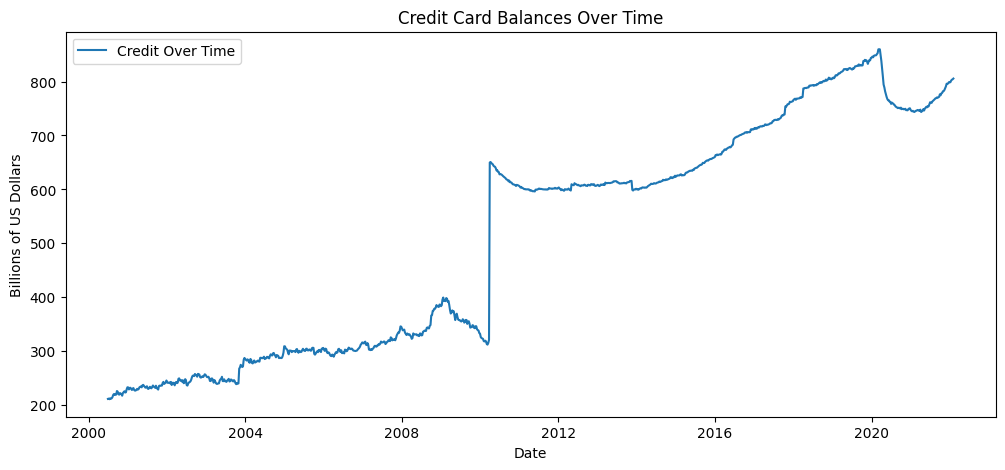

In [ ]:
#Credit card balances line plot
plt.figure(figsize=(12,5))
plt.plot(credit_card_balances, label = "Credit Over Time")
plt.title("Credit Card Balances Over Time")
plt.xlabel("Date")
plt.ylabel("Billions of US Dollars")
plt.legend();

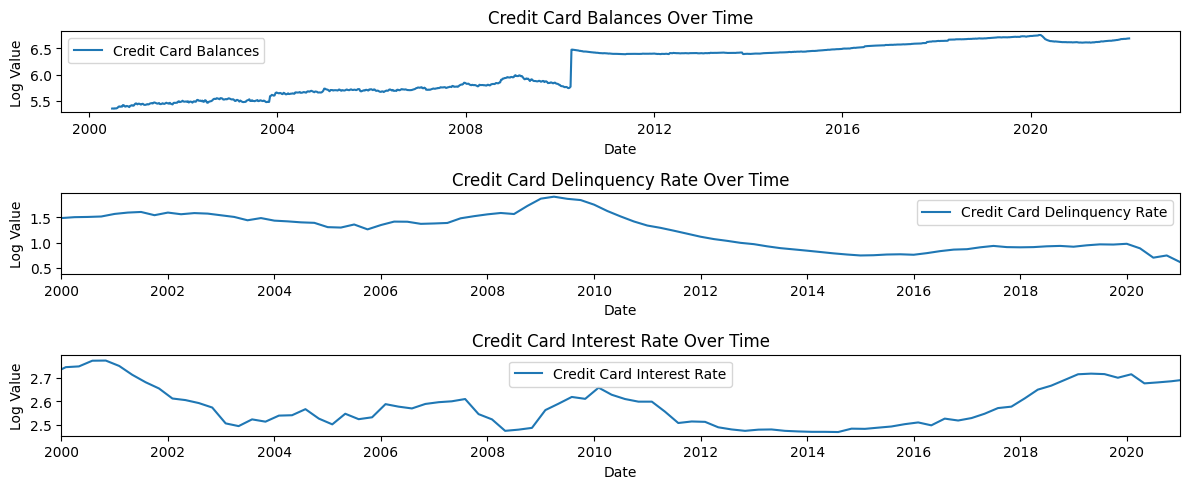

In [ ]:

#figure size
fig, axs = plt.subplots(3, 1, figsize=(12, 5))

# Credit card graph
axs[0].plot(np.log(credit_card_balances), label='Credit Card Balances')
axs[0].set_title('Credit Card Balances Over Time')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Log Value')
axs[0].legend()

# Deliquency rate graph
axs[1].plot(np.log(deliquency_rates), label='Credit Card Delinquency Rate')
axs[1].set_title('Credit Card Delinquency Rate Over Time')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Log Value')
axs[1].legend()
axs[1].set_xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2020-12-31'))

# Interest rate graph
axs[2].plot(np.log(interest_rates), label='Credit Card Interest Rate')
axs[2].set_title('Credit Card Interest Rate Over Time')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Log Value')
axs[2].legend()
axs[2].set_xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2020-12-31'))

# Spacing
plt.tight_layout();

Though the three data frames are not of the same dates in the time period 2000 to 2020. The trend can be deduced, as the the interest rate increases both credit card balances and delinquency rates tend to increase.

In [ ]:


def compareCredit(credit_card_balances, interest_rates, delinquency_rates=None):
    credit_card_balances = quandl.get("FRED/CCLACBW027SBOG").rename(columns = {"Value":"Balance"})
    interest_rates = quandl.get("FRED/TERMCBCCALLNS").rename(columns = {"Value":"Interest Rate"})
    # Set default values for data frames
    if delinquency_rates is None:
        delinquency_rates = pd.DataFrame(index=credit_card_balances.index, columns=['Rate'], data=np.random.randn(len(credit_card_balances)))

    # Figure size
    fig, axs = plt.subplots(3, 1, figsize=(12, 5))

    # Credit card graph
    axs[0].plot(np.log(credit_card_balances), label='Credit Card Balances')
    axs[0].set_title('Credit Card Balances Over Time')
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Log Value')
    axs[0].legend()

    # Delinquency rate graph
    axs[1].plot(np.log(delinquency_rates), label='Credit Card Delinquency Rate')
    axs[1].set_title('Credit Card Delinquency Rate Over Time')
    axs[1].set_xlabel('Date')
    axs[1].set_ylabel('Log Value')
    axs[1].legend()
    axs[1].set_xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2020-12-31'))

    # Interest rate graph
    axs[2].plot(np.log(interest_rates), label='Credit Card Interest Rate')
    axs[2].set_title('Credit Card Interest Rate Over Time')
    axs[2].set_xlabel('Date')
    axs[2].set_ylabel('Log Value')
    axs[2].legend()
    axs[2].set_xlim(pd.Timestamp('2000-01-01'), pd.Timestamp('2020-12-31'))

    # Spacing
    plt.tight_layout()


#compareCredit(credit_card_balances, interest_rates, deliquency_rates)

Let's try our function `compareCredit()` to other credit card delinquencies from FRED below.

In [ ]:
#Delinquency Rate on Credit Card Loans, Banks Ranked 1st to 100th Largest in Size by Assets (DRCCLT100S)
deliquency_1st = quandl.get("FRED/DRCCLT100S").rename(columns = {"Value":"Deliquency Rate"})

#Delinquency Rate on Credit Card Loans, Banks Not Among the 100 Largest in Size by Assets (DRCCLOBS)
deliquency_2nd = quandl.get("FRED/DRCCLOBS").rename(columns = {"Value":"Deliquency Rate"})

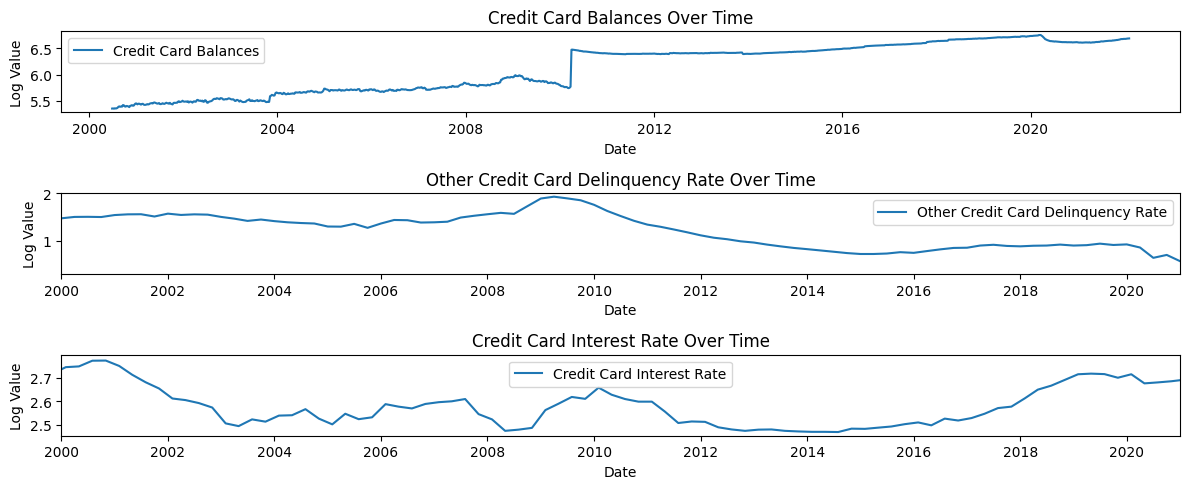

In [ ]:
compareCredit(credit_card_balances, interest_rates, deliquency_1st)

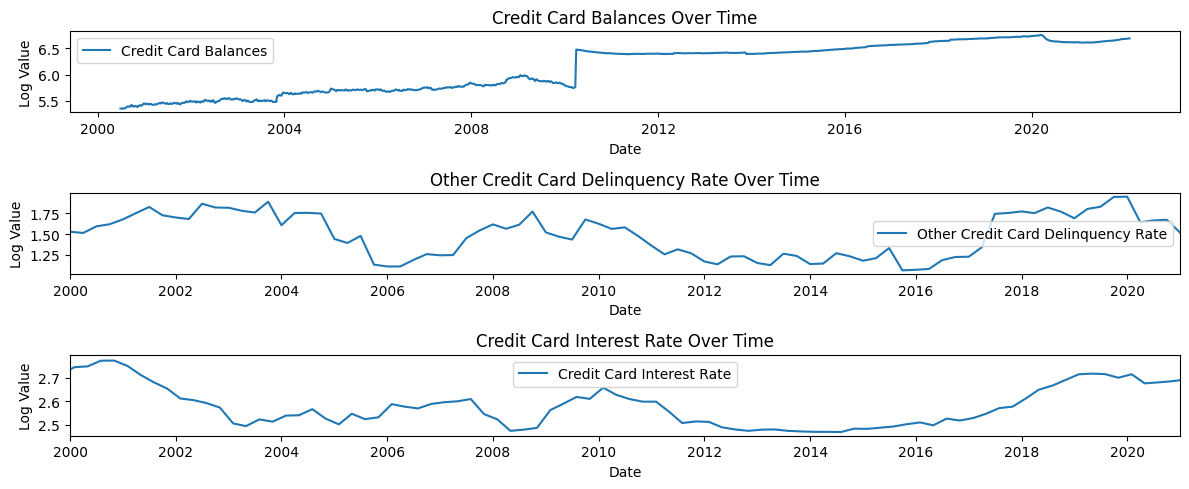

In [ ]:
compareCredit(credit_card_balances, interest_rates, deliquency_2nd)

The similar trend is observed, as interest rate increases both credit balance and delinquency rate tend to increase. Therefore, the credit card credit for an individual is a proxy of other forms of credit card loans.

Mean:Interest Rate    13.727431
dtype: float64
STD:Interest Rate    1.42036
dtype: float64



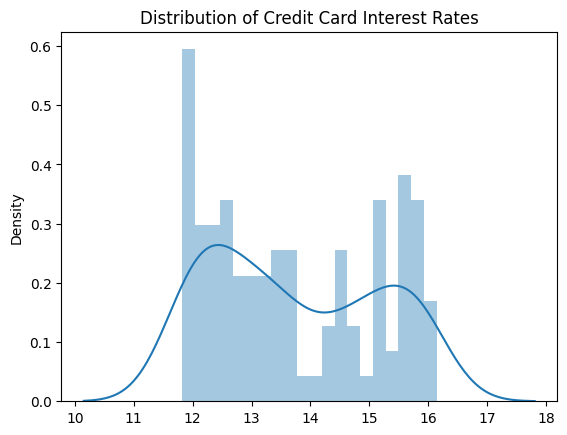

In [ ]:

import warnings
warnings.simplefilter('ignore')

#interest rate
print(f"Mean:{interest_rates.mean()}\nSTD:{interest_rates.std()}\n")
sns.distplot(interest_rates,bins=20).set_title("Distribution of Credit Card Interest Rates");

Mean:Deliquency Rate    3.839268
dtype: float64
STD:Deliquency Rate    1.180129
dtype: float64



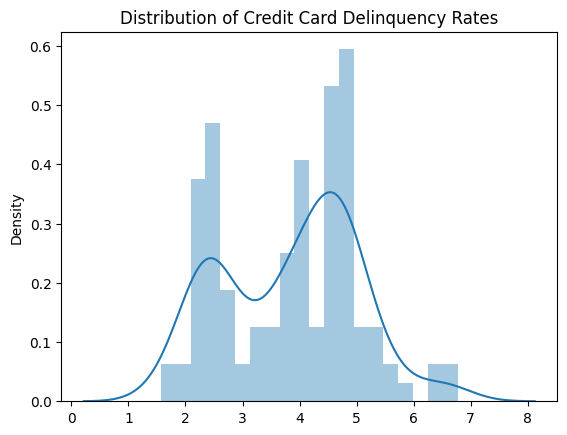

In [ ]:
#deliquency rate
print(f"Mean:{deliquency_rates.mean()}\nSTD:{deliquency_rates.std()}\n")
sns.distplot(deliquency_rates,bins=20).set_title("Distribution of Credit Card Delinquency Rates");

Mean:Balance    510.78488
dtype: float64
STD:Balance    211.151801
dtype: float64



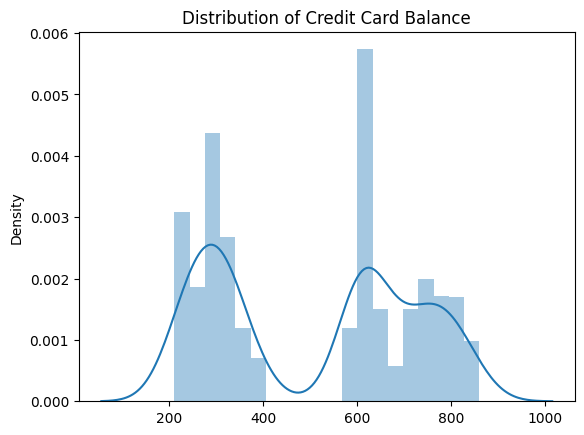

In [ ]:

#credit card balance
print(f"Mean:{credit_card_balances.mean()}\nSTD:{credit_card_balances.std()}\n")
sns.distplot(credit_card_balances,bins=20).set_title("Distribution of Credit Card Balance");

The distribution of the three data Series are not normally distributed. This leads to extreme values either positive or negative.

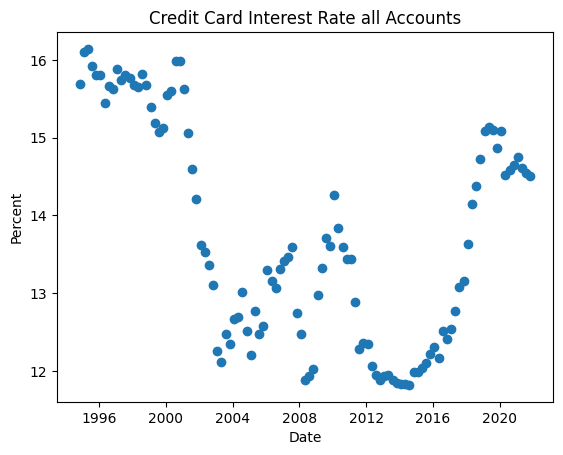

In [ ]:
plt.scatter(interest_rates.index,interest_rates["Interest Rate"])
plt.title("Credit Card Interest Rate all Accounts")
plt.xlabel("Date")
plt.ylabel("Percent");

The interest rate is affected by economic downturns and inflation. After the 2008 Financial Crisis and recent COVID-19 pandemic there is a sharp rise in interest rate to offset high credit card balances.

#### **Money at a Fixed Rate for a Business for a Construction Loan(Jumbo 30-Year Fixed Mortgage Rates)**

In [ ]:
#check the null values
Mortgage_rates.isnull().sum()

Date                         0
TimePeriod                   0
MortgageRateJumboFixed    1606
dtype: int64

The null values are only on one column(MortgageRateJumboFixed)

In [ ]:
#dimensions of the data
Mortgage_rates.shape

(20028, 3)

We have 20028 rows and 1606 null values.Lets drop the null values

In [ ]:
Mortgage_rates.dropna(inplace = True)

In [ ]:
Mortgage_rates.isnull().sum()

Date                      0
TimePeriod                0
MortgageRateJumboFixed    0
dtype: int64

All the null values have been dropped

In [ ]:
#Get the descriptive Statistics
Mortgage_rates.describe()

,MortgageRateJumboFixed
count,18422.000000
mean,4.173412
std,0.326827
min,3.550000
25%,3.930000
50%,4.090000
75%,4.360000
max,5.290000


In [ ]:
#Checking the data type
Mortgage_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18422 entries, 2 to 20027
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    18422 non-null  object 
 1   TimePeriod              18422 non-null  object 
 2   MortgageRateJumboFixed  18422 non-null  float64
dtypes: float64(1), object(2)
memory usage: 575.7+ KB


In [ ]:
#Plotting a graph of fixed mortgage rate VS Date
import plotly.express as px
import plotly.graph_objects as go

# Convert 'Date' column is in a datetime format
Mortgage_rates['Date'] = pd.to_datetime(Mortgage_rates['Date'])

# Create an interactive line plot using plotly express
fig = px.line(Mortgage_rates, x='Date', y='MortgageRateJumboFixed', title='Jumbo 30-Year Fixed Mortgage Rates over Time',
              labels={'MortgageRateJumboFixed': 'Fixed Mortgage Rate', 'Date': 'Date'})

# Update the x-axis format to display the date nicely
fig.update_xaxes(type='category')

# Show the plot
fig.show()

#### **Illiquid Security - AAPL -NASQAD**

In [ ]:
#Dimensions of the data
stock_data.shape

(753, 6)

In [ ]:
#descriptive statistics
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,753.000000,753.000000,753.000000,753.000000,753.000000,7.530000e+02
mean,155.932059,157.662537,154.340584,156.082563,154.845605,7.925892e+07
std,19.842510,19.822942,19.890358,19.871115,20.279402,2.786147e+07
min,119.029999,120.400002,116.209999,116.360001,114.511497,2.404830e+07
25%,141.690002,143.369995,139.449997,141.910004,140.385315,5.849910e+07
50%,152.580002,154.580002,150.850006,152.869995,151.692871,7.460200e+07
75%,172.300003,173.949997,170.970001,172.690002,171.611877,9.261200e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.954327e+08


In [ ]:
#check the null values
stock_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
import plotly.express as px

# Plotting Closing Prices with Plotly
fig = px.line(stock_data, x=stock_data.index, y='Close', labels={'x': 'Date', 'y': 'Closing Price'},
              title=f'{symbol} Closing Prices Over Time')
fig.update_xaxes(type='category')
fig.show()



The Plotly line plot illustrates the historical closing prices of the specified OTC stock, 'AAPL,' showcasing the trend and fluctuations in its market value over the given time period from January 2021 to December 2023.It shows the highest closing price of 198.11 was on December 14th 2023 and the lowest price of 116.63 at 8th march 2022.There is also fluctuatu

In [ ]:
# Plotting Daily Returns with Plotly
stock_data['Daily Return'] = stock_data['Close'].pct_change()
fig = px.line(stock_data, x=stock_data.index, y='Daily Return', labels={'x': 'Date', 'y': 'Daily Return'},
              title=f'{symbol} Daily Returns Over Time')
fig.update_xaxes(type='category')
fig.show()



Another Plotly Express line plot showcases the daily returns of the OTC stock, revealing the percentage change in closing prices on a day-to-day basis and aiding in the observation of the stock's volatility and potential patterns.

In [ ]:
# Distribution of Daily Returns with Plotly
fig = px.histogram(stock_data, x='Daily Return', nbins=50, title=f'Distribution of {symbol} Daily Returns')
fig.show()




The Plotly histogram visualizes the distribution of daily returns, offering insights into the frequency and range of percentage changes in closing prices, helping to assess the stock's risk and potential for extreme movements.

In [ ]:
# Plotting Trading Volume with Plotly
fig = px.line(stock_data, x=stock_data.index, y='Volume', labels={'x': 'Date', 'y': 'Volume'},
              title=f'{symbol} Trading Volume Over Time')
fig.update_xaxes(type='category')
fig.show()

Using Plotly Express, this line plot depicts the trading volume of the OTC stock throughout the specified period, highlighting potential correlations between volume spikes and significant price movements, providing context to market activity.

#### **Analysis for Money at a floating rate for a secured purchase**

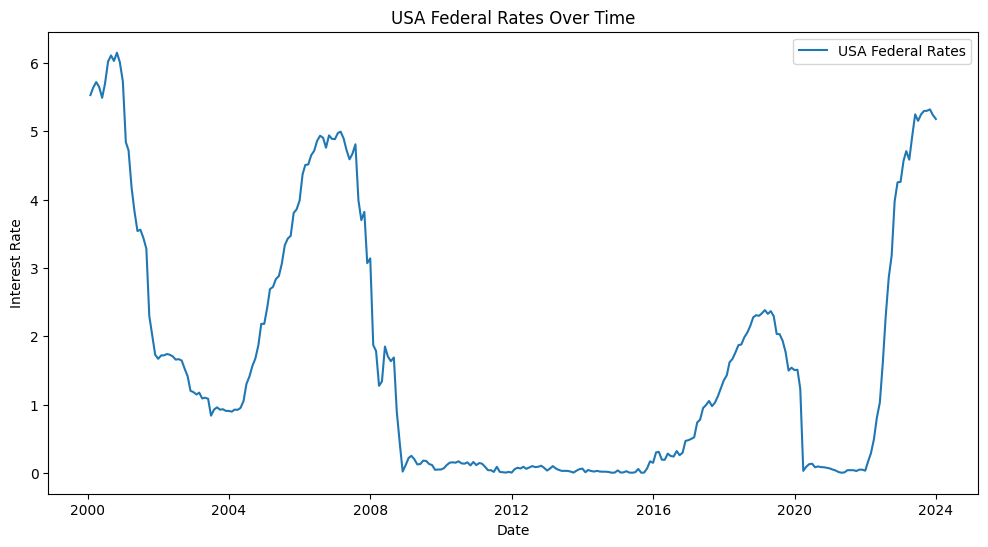

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(fed_rates_monthly.index, fed_rates_monthly.values, label='USA Federal Rates')
plt.title('USA Federal Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.legend()
plt.show()

# Insight: USA Federal Rates have shown fluctuations over time, reflecting changes in the country's monetary policy.

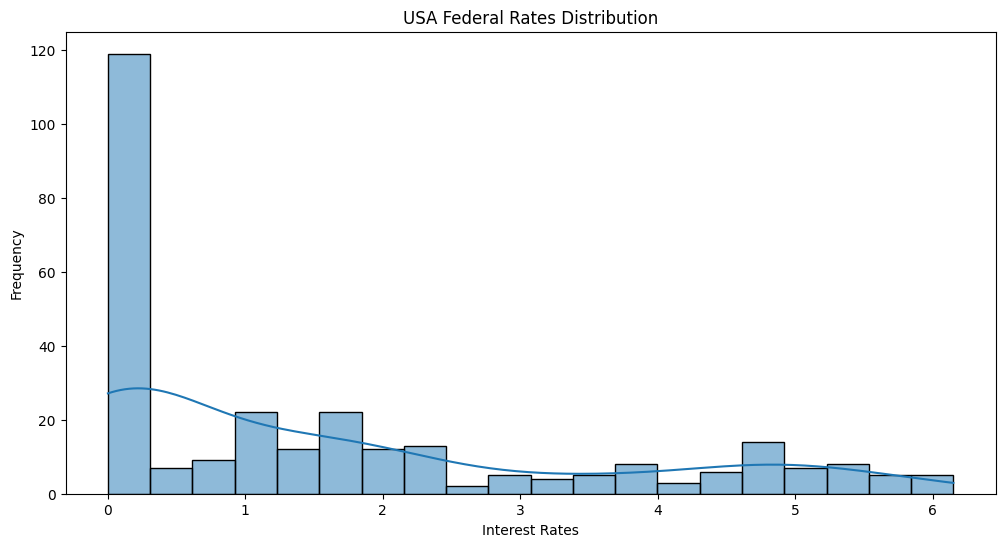

In [ ]:
# Distribution of fed rates (Right Skewed)

plt.figure(figsize=(12, 6))
sns.histplot(fed_rates_monthly.values, bins=20, kde=True)
plt.title('USA Federal Rates Distribution')
plt.xlabel('Interest Rates')
plt.ylabel('Frequency')
plt.show()

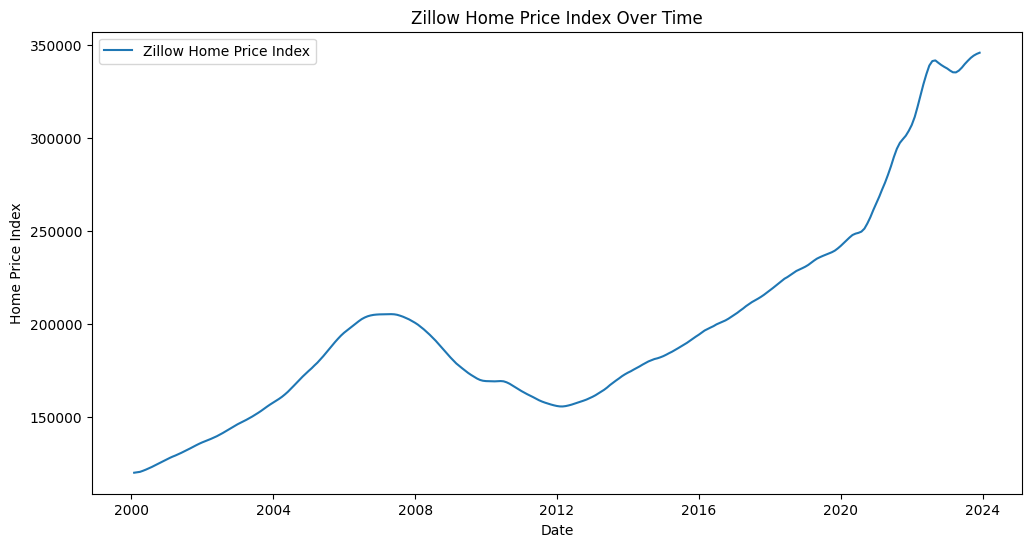

In [ ]:
# Zillow Home Price Index Over Time
plt.figure(figsize=(12, 6))
plt.plot(usa_prices_series.index, usa_prices_series.values, label='Zillow Home Price Index')
plt.title('Zillow Home Price Index Over Time')
plt.xlabel('Date')
plt.ylabel('Home Price Index')
plt.legend()
plt.show()

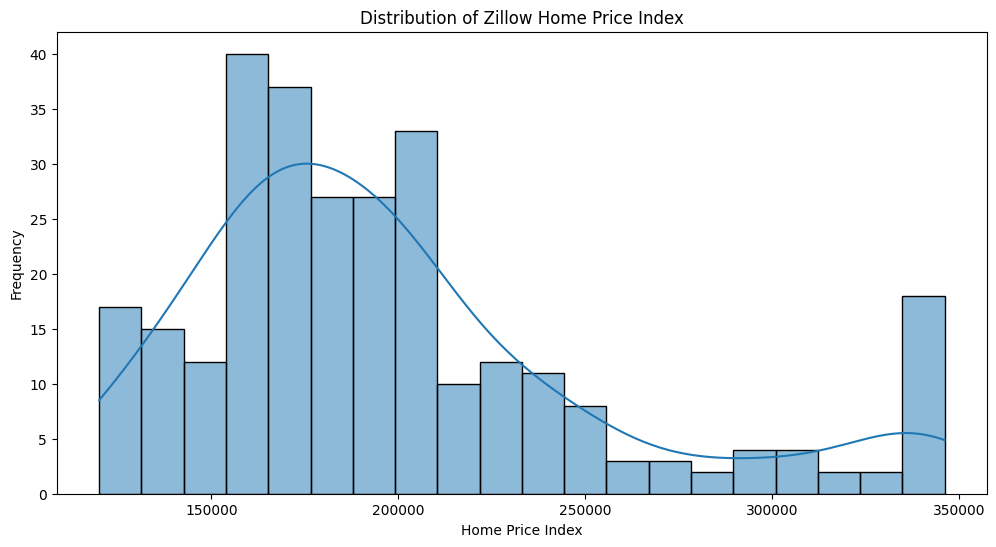

In [ ]:
# Distribution of Zillow Home Price Index (Right Skewed)

plt.figure(figsize=(12, 6))
sns.histplot(usa_prices_series.values, bins=20, kde=True)
plt.title('Distribution of Zillow Home Price Index')
plt.xlabel('Home Price Index')
plt.ylabel('Frequency')
plt.show()

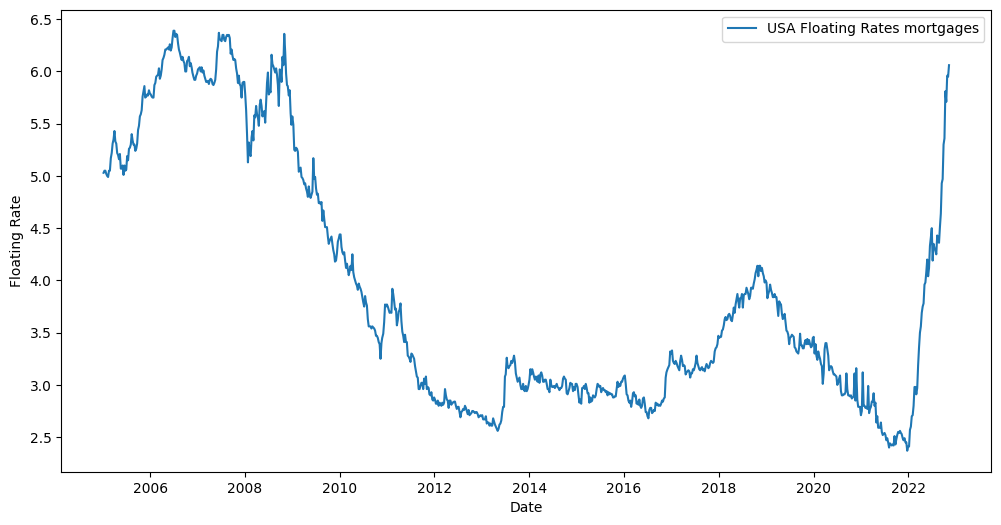

In [ ]:
# USA Floating Rates mortgages

plt.figure(figsize=(12, 6))
plt.plot(usa_mortgage_frates.index, usa_mortgage_frates.values, label='USA Floating Rates mortgages')
plt.xlabel('Date')
plt.ylabel('Floating Rate')
plt.legend()
plt.show()

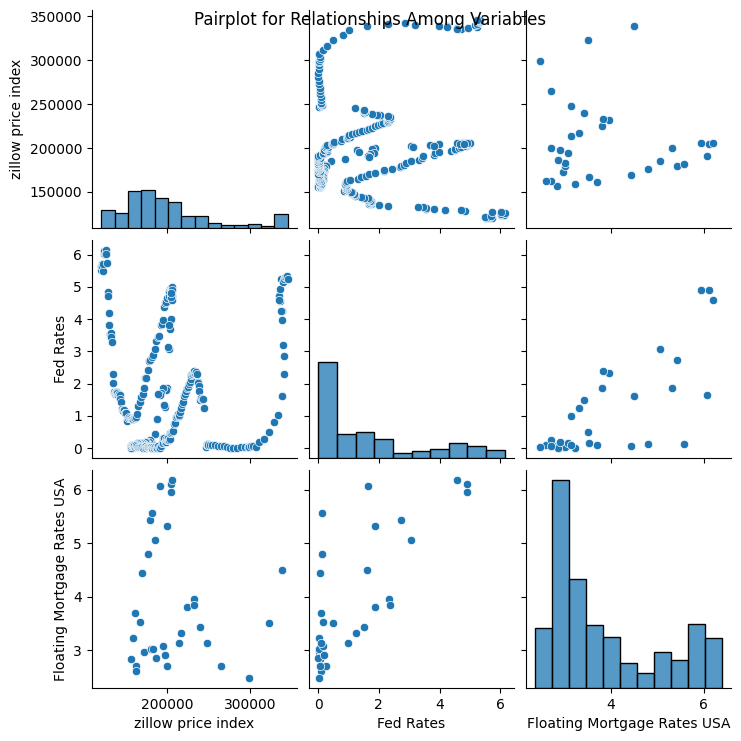

In [ ]:
# Pairplot for Relationships Among Variables
merged_data = pd.concat([usa_prices_series, fed_rates_monthly, usa_mortgage_frates.MORTGAGE5US], axis=1)
merged_data.columns = ['zillow price index', 'Fed Rates', 'Floating Mortgage Rates USA']

sns.pairplot(merged_data, kind='scatter')
plt.suptitle('Pairplot for Relationships Among Variables')
plt.show()

In [ ]:
merged_data.corr()

<ipython-input-14-cc54846d37e8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_data.corr()


,Fed Rates,Floating Mortgage Rates USA
Fed Rates,1.000000,0.756089
Floating Mortgage Rates USA,0.756089,1.000000


In [ ]:
def describe_cdf(data):
    cdf = np.cumsum(np.sort(data)) / np.sum(data)
    # Plot the CDF
    plt.plot(np.sort(data), cdf, label='CDF')
    plt.title('Cumulative Distribution Function (CDF)')
    plt.xlabel('Values')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.show()

    # Calculate statistics of the CDF
    cdf_stats = describe(cdf)

    # Print CDF statistics
    print("\nStatistics of the Cumulative Distribution Function (CDF):")
    print(f"Mean: {cdf_stats.mean:.4f}")
    print(f"Minimum: {cdf_stats.minmax[0]:.4f}")
    print(f"Maximum: {cdf_stats.minmax[1]:.4f}")
    print(f"Variance: {cdf_stats.variance:.4f}")
    print(f"Skewness: {cdf_stats.skewness:.4f}")
    print(f"Kurtosis: {cdf_stats.kurtosis:.4f}")

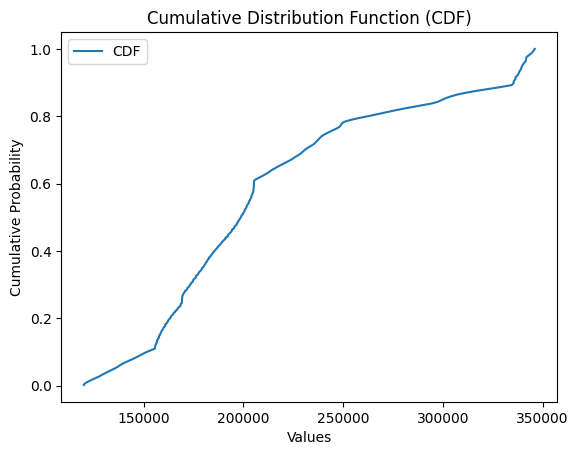


Statistics of the Cumulative Distribution Function (CDF):
Mean: 0.4277
Minimum: 0.0021
Maximum: 1.0000
Variance: 0.0788
Skewness: 0.2748
Kurtosis: -1.0568


In [ ]:
describe_cdf(usa_prices_series.values.tolist())

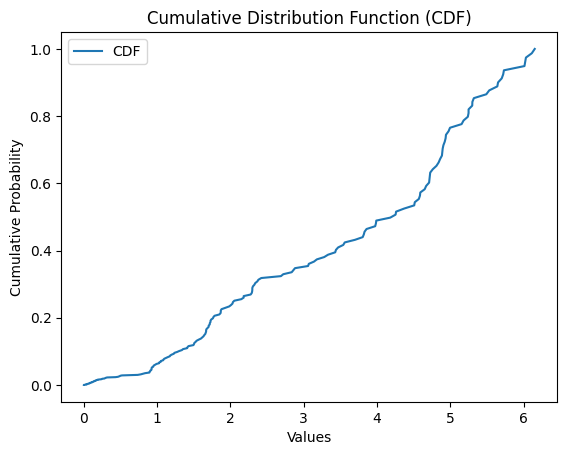


Statistics of the Cumulative Distribution Function (CDF):
Mean: 0.2055
Minimum: 0.0000
Maximum: 1.0000
Variance: 0.0745
Skewness: 1.3582
Kurtosis: 0.6932


In [ ]:
describe_cdf(fed_rates_monthly)

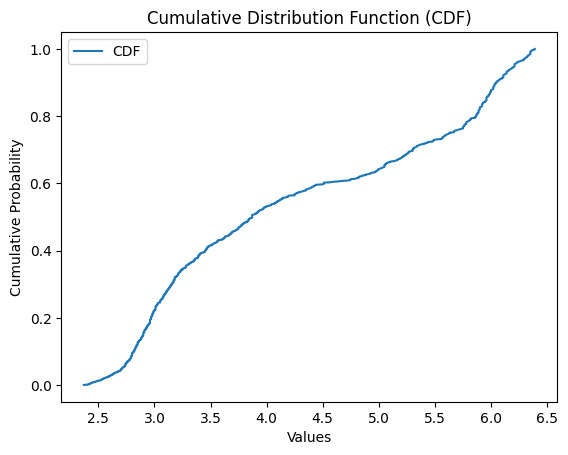


Statistics of the Cumulative Distribution Function (CDF):
Mean: 0.4169
Minimum: 0.0007
Maximum: 1.0000
Variance: 0.0780
Skewness: 0.3743
Kurtosis: -0.9695


In [ ]:
describe_cdf(usa_mortgage_frates.MORTGAGE5US)

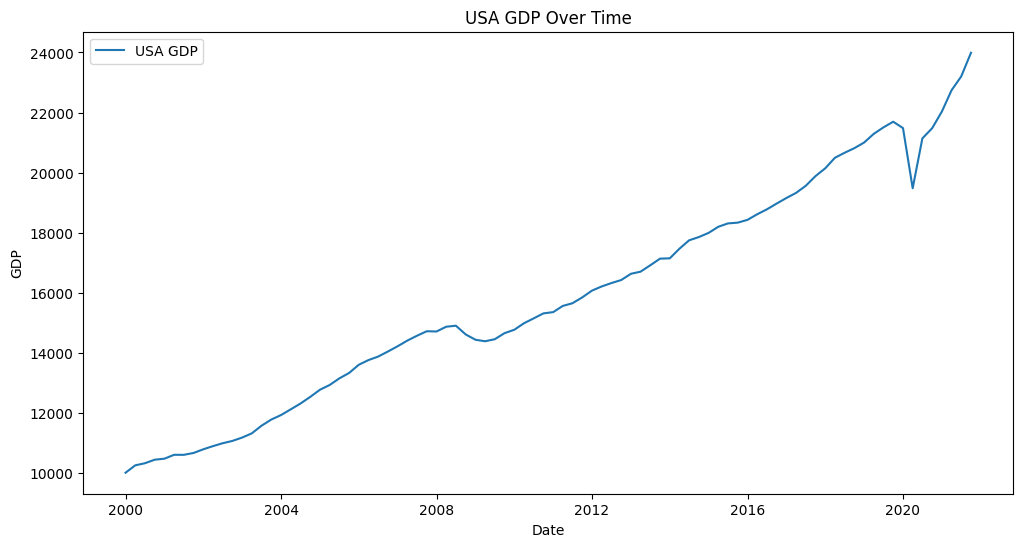

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(fred_gdp.index, fred_gdp.values, label='USA GDP')
plt.title('USA GDP Over Time')
plt.xlabel('Date')
plt.ylabel('GDP')
plt.legend()
plt.show()


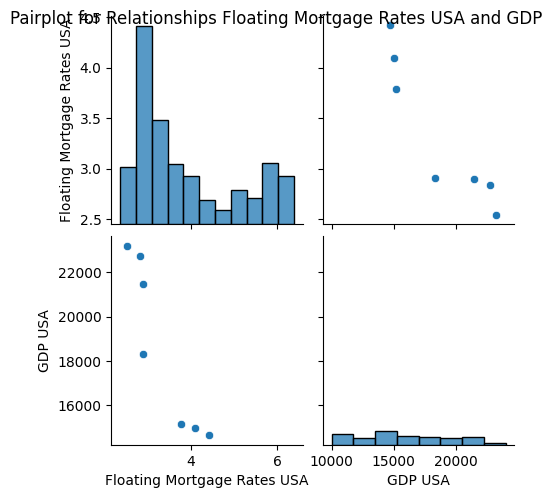

In [ ]:
merged_frate_gdp = pd.concat([usa_mortgage_frates.MORTGAGE5US, fred_gdp], axis=1)
merged_frate_gdp.columns = ['Floating Mortgage Rates USA', 'GDP USA']

sns.pairplot(merged_frate_gdp, kind='scatter')
plt.suptitle('Pairplot for Relationships Floating Mortgage Rates USA and GDP')
plt.show()

In [ ]:
merged_frate_gdp.corr()

,Floating Mortgage Rates USA,GDP USA
Floating Mortgage Rates USA,1.000000,-0.924232
GDP USA,-0.924232,1.000000


#### **Publicly traded bond (e.g. treasury bond, corporate bond) – that is, securities lending of a bond.**

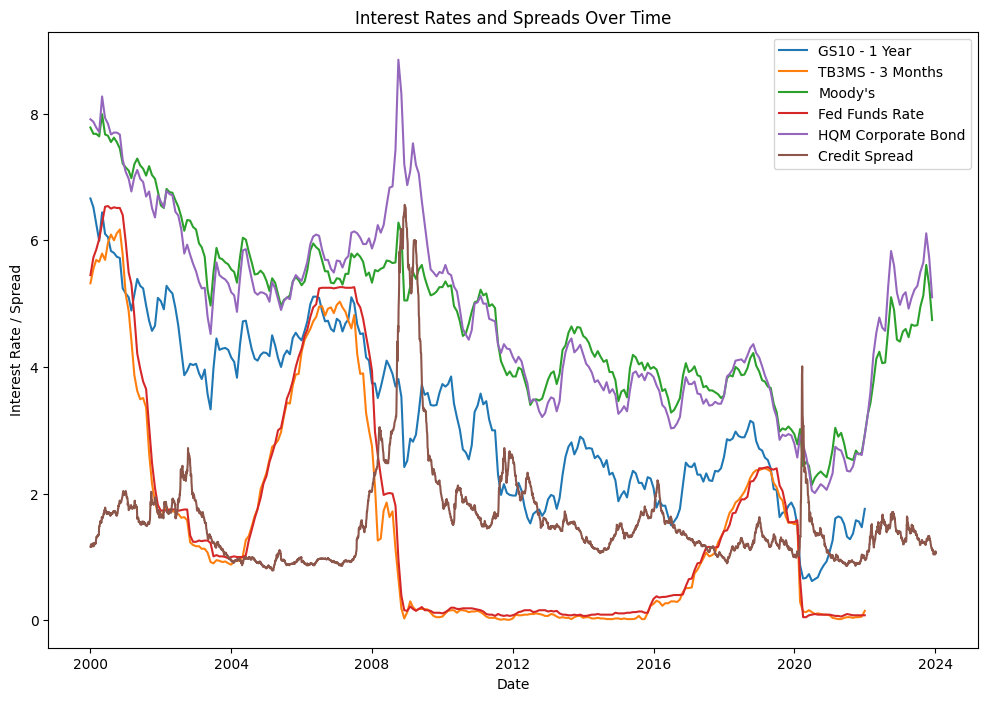

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(fred_gs10.index, fred_gs10.values, label='GS10 - 1 Year')
plt.plot(fred_tb3ms.index, fred_tb3ms.values, label='TB3MS - 3 Months')
plt.plot(moodys_fred_df.loc['2000-01-01':].index, moodys_fred_df.loc['2000-01-01':].values, label="Moody's")
plt.plot(fred_fedfunds.index, fred_fedfunds.values, label='Fed Funds Rate')
plt.plot(hqmcv10yr_fred_df.loc['2000-01-01':].index, hqmcv10yr_fred_df.loc['2000-01-01':].values, label='HQM Corporate Bond')
plt.plot(ice_fred_df.index, ice_fred_df.values, label='Credit Spread')
plt.title('Interest Rates and Spreads Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Rate / Spread')
plt.legend()
plt.show()

The fact that the various indicators, including the 10-Year Treasury Constant Maturity Rate, 3-Month Treasury Constant Maturity Rate, Effective Federal Funds Rate, HQM Corporate Bond Spot Rate (HQMCB10YR), and the ICE BofA US Corporate Index Option-Adjusted Spread (BAMLC0A0CM), show correlated movement suggests a strong interdependence among these variables. This could indicate that changes in interest rates and credit spreads are influencing each other.

In [ ]:
correlation_matrix = pd.concat([fred_gs10, fred_tb3ms, moodys_fred_df, fred_fedfunds, hqmcv10yr_fred_df, ice_fred_df], axis=1).corr()

correlation_matrix

,10-Year Treasury Constant Maturity Rate,3-Month Treasury Constant Maturity Rate,AAA,Effective Federal Funds Rate,HQMCB10YR,BAMLC0A0CM
10-Year Treasury Constant Maturity Rate,1.000000,0.770386,0.949838,0.768527,0.890660,-0.046686
3-Month Treasury Constant Maturity Rate,0.770386,1.000000,0.630576,0.993621,0.594486,-0.246200
AAA,0.949838,0.630576,1.000000,0.641592,0.987149,0.172555
Effective Federal Funds Rate,0.768527,0.993621,0.641592,1.000000,0.610351,-0.215908
HQMCB10YR,0.890660,0.594486,0.987149,0.610351,1.000000,0.369767
BAMLC0A0CM,-0.046686,-0.246200,0.172555,-0.215908,0.369767,1.000000


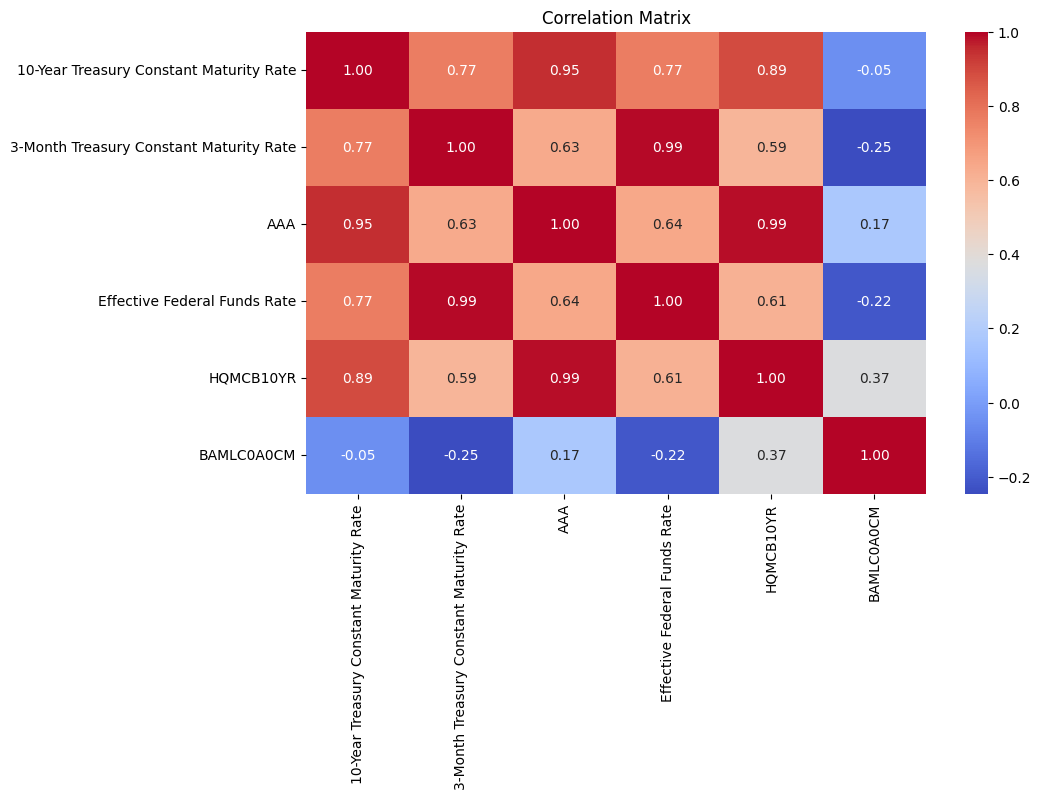

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

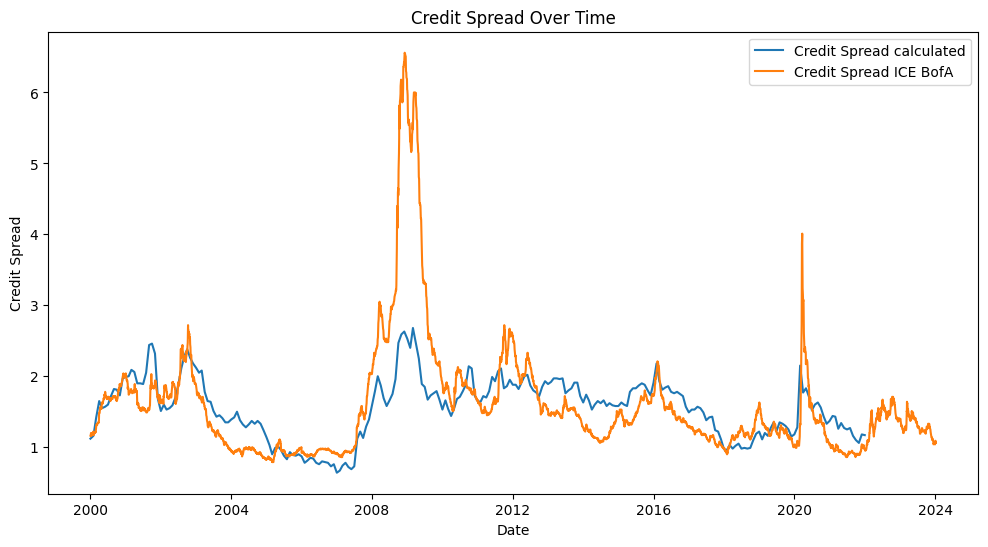

In [ ]:
# Let's calculate our credit spread and compare it with ICE BofA

common_dates = np.intersect1d(moodys_fred_df.index, fred_gs10.index)
credit_spread_cal = moodys_fred_df.loc[common_dates].values - fred_gs10.loc[common_dates].values

# Plotting Credit Spread Volatility
plt.figure(figsize=(12, 6))
plt.plot(common_dates, credit_spread_cal, label='Credit Spread calculated')
plt.plot(ice_fred_df.index, ice_fred_df.values, label='Credit Spread ICE BofA')
plt.title('Credit Spread Over Time')
plt.xlabel('Date')
plt.ylabel('Credit Spread')
plt.legend()
plt.show()

In [ ]:
spread_stat = describe(credit_spread_cal.flatten())
print("Statistical Measures of credit spread calculated:")
print(f"Mean: {spread_stat.mean:.4f}")
print(f"Minimum: {spread_stat.minmax[0]:.4f}")
print(f"Maximum: {spread_stat.minmax[1]:.4f}")
print(f"Variance: {spread_stat.variance:.4f}")
print(f"Skewness: {spread_stat.skewness:.4f}")
print(f"Kurtosis: {spread_stat.kurtosis:.4f}")

Statistical Measures of credit spread calculated:
Mean: 1.5571
Minimum: 0.6400
Maximum: 2.6800
Variance: 0.1817
Skewness: -0.0551
Kurtosis: -0.3330


In [ ]:
spread_stat = describe(ice_fred_df.values.flatten())
print("Statistical Measures of credit spread ICE BofA:")
print(f"Mean: {spread_stat.mean:.4f}")
print(f"Minimum: {spread_stat.minmax[0]:.4f}")
print(f"Maximum: {spread_stat.minmax[1]:.4f}")
print(f"Variance: {spread_stat.variance:.4f}")
print(f"Skewness: {spread_stat.skewness:.4f}")
print(f"Kurtosis: {spread_stat.kurtosis:.4f}")

Statistical Measures of credit spread ICE BofA:
Mean: 1.5917
Minimum: 0.7900
Maximum: 6.5600
Variance: 0.7223
Skewness: 3.2659
Kurtosis: 13.2256


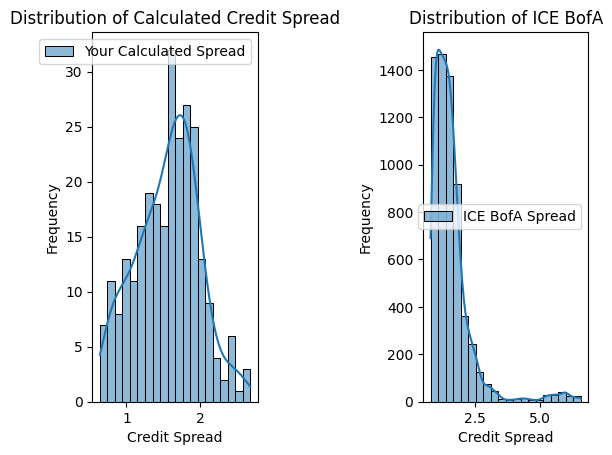

In [ ]:
plt.subplot(1, 2, 1)
sns.histplot(credit_spread_cal, bins=20, kde=True, color='blue', label='Your Calculated Spread')
plt.title('Distribution of Calculated Credit Spread')
plt.xlabel('Credit Spread')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(ice_fred_df, bins=20, kde=True, color='orange', label='ICE BofA Spread')
plt.title('Distribution of ICE BofA')
plt.xlabel('Credit Spread')
plt.ylabel('Frequency')
plt.legend()
plt.subplots_adjust(wspace=1)

plt.show()

Our calculated spread lacks variety

The low correlation between ICE BofA US corporate index and various interest rates suggest that the relationship may not be well described by a linear function. While FED rates have higher correlation with various bonds.

####**Publicly traded Equity (e.g. common stock) – that is, securities lending of a stock.**

In our Analysis we consider 5 Technology Sector Tickers for Securities Lending:
- AAPL (Apple Inc.) - A large-cap blue-chip with high liquidity and consistent dividend payments.
- MSFT (Microsoft Corp.) - Another large-cap with strong fundamentals and potential for stable returns.
- TSLA (Tesla Inc.) - A high-growth, high-volatility stock that can potentially provide higher lending fees but also carries increased risk.
- NVDA (NVIDIA Corp.) - A leader in the semiconductor industry with high demand and stable growth, making it a relatively low-risk lending option.
- AMZN (Amazon.com Inc.) - A dominant e-commerce player with consistent growth and high liquidity, attracting both borrowers and lenders.

In [ ]:
stock_AClose.describe()

,AAPL AClose,AMZN AClose,MSFT AClose,NVDA AClose,TSLA AClose
count,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000
mean,76.363649,84.711274,145.514579,101.436274,94.598153
std,56.870265,51.382320,102.903707,119.172054,108.648047
min,15.648318,14.347500,29.455141,3.622794,9.289333
25%,27.418834,36.829749,49.892033,12.947345,15.872834
50%,46.430143,86.987247,105.065338,52.160046,21.936000
75%,133.160469,127.799999,239.814014,147.396069,201.442497
max,198.110001,186.570496,382.700012,522.530029,409.970001


In [ ]:
stock_volume.describe()

,AAPL volume,AMZN volume,MSFT volume,NVDA volume,TSLA volume
count,2.514000e+03,2.514000e+03,2.514000e+03,2.514000e+03,2.514000e+03
mean,1.360329e+08,8.025016e+07,3.011418e+07,4.586564e+07,1.132496e+08
std,8.353834e+07,4.163263e+07,1.390142e+07,2.564344e+07,7.549179e+07
min,2.404830e+07,1.762600e+07,7.425600e+06,4.564400e+06,1.062000e+07
25%,8.105900e+07,5.389502e+07,2.165552e+07,2.939725e+07,6.643095e+07
50%,1.119380e+08,6.883900e+07,2.684360e+07,4.033920e+07,9.323365e+07
75%,1.663902e+08,9.291200e+07,3.426010e+07,5.524370e+07,1.324067e+08
max,1.065523e+09,4.771220e+08,2.025224e+08,3.692928e+08,9.140820e+08


In [ ]:

#Transforming data for comparison purpose
stock_AClose = np.log(stock_AClose) - np.log(stock_AClose.shift(1))
stock_volume = np.log(stock_volume)
stock_AClose=stock_AClose.iloc[1:,0:]

In [ ]:
stock_AClose

,AAPL AClose,AMZN AClose,MSFT AClose,NVDA AClose,TSLA AClose
Date,,,,,
2014-01-14,0.019703,0.016639,0.022613,0.030772,0.146163
2014-01-15,0.019878,-0.004210,0.027021,0.010675,0.017579
2014-01-16,-0.005595,-0.000177,0.003530,0.003118,0.040829
2014-01-17,-0.024807,0.009580,-0.013921,-0.004368,-0.005631
2014-01-21,0.015417,0.018447,-0.005789,0.003745,0.038483
...,...,...,...,...,...
2024-01-02,-0.036443,-0.013317,-0.013844,-0.027722,-0.000241
2024-01-03,-0.007516,-0.009786,-0.000728,-0.012514,-0.040961
2024-01-04,-0.012781,-0.026619,-0.007203,0.008978,-0.002183


**Trend Over Time**

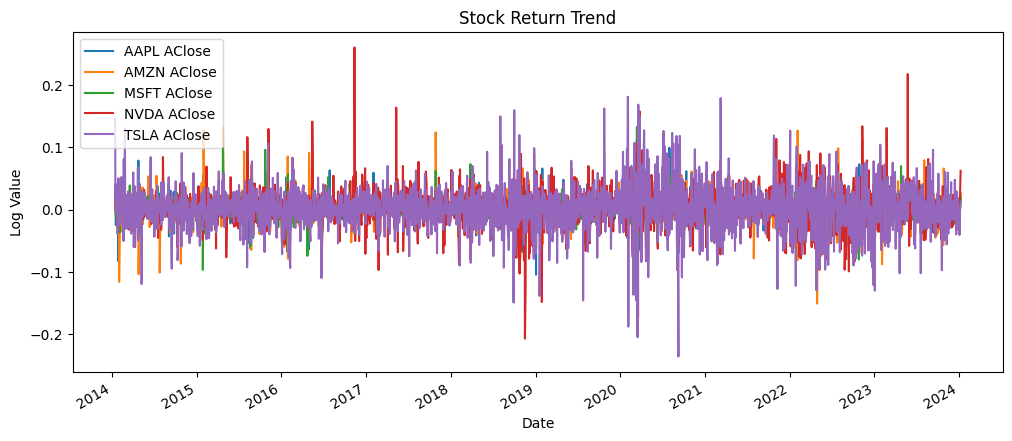

In [ ]:
stock_AClose.plot(figsize=(12, 5))
plt.title("Stock Return Trend")
plt.ylabel("Log Value");

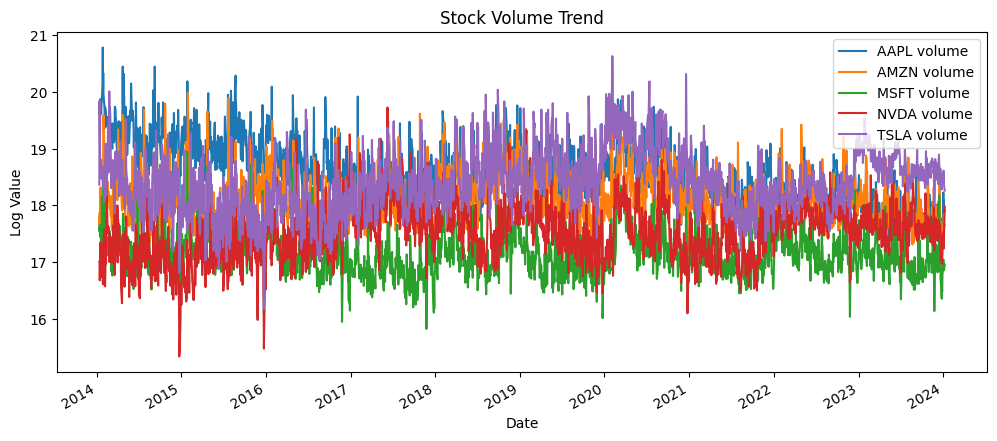

In [ ]:
stock_volume.plot(figsize=(12,5))
plt.title("Stock Volume Trend")
plt.ylabel("Log Value");

**Correlations**

In [ ]:
correlation=stock_AClose.corr()

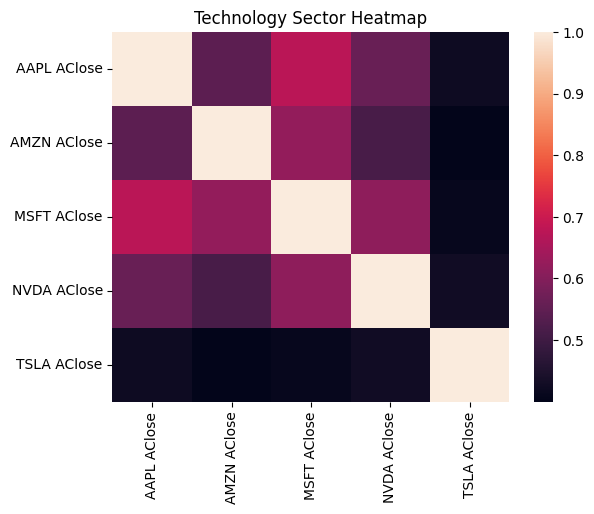

In [ ]:
sns.heatmap(correlation)
plt.title("Technology Sector Heatmap");

Stocks in the same sector are highly correlated, because they face similar shocks

**Volatility**

In [ ]:
volatility=stock_AClose.rolling(50).std()

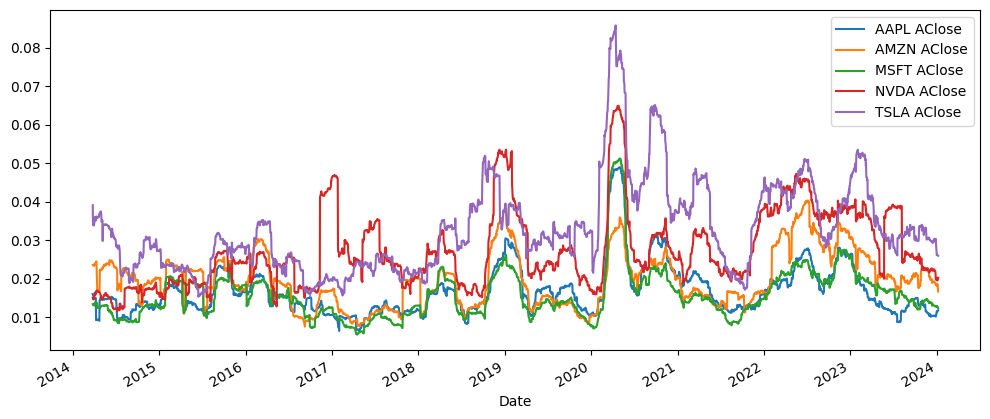

In [ ]:
#fluctuations
volatility.plot(figsize=(12,5));

In [ ]:
stock_AClose.std().sort_values(ascending=False)

TSLA AClose    0.035009
NVDA AClose    0.029011
AMZN AClose    0.020876
AAPL AClose    0.017907
MSFT AClose    0.017030
dtype: float64

The more volatile the asset is the higher the potential of retain, at the same time the riskier it is.

**Distribution**

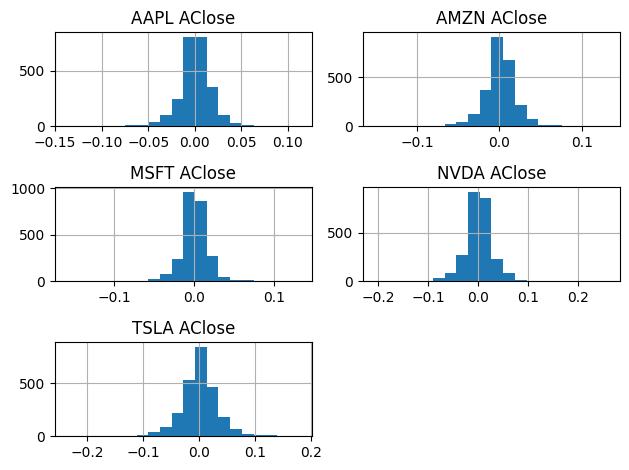

In [ ]:
stock_AClose.hist(bins=20)
plt.tight_layout();

In [ ]:

from scipy import stats
stats.normaltest((np.array(stock_AClose)))

NormaltestResult(statistic=array([334.34531073, 327.9295896 , 406.81972769, 414.87286603,
       268.7768243 ]), pvalue=array([2.49941430e-73, 6.18008421e-72, 4.57318286e-89, 8.15646162e-91,
       4.32368626e-59]))

The pvalues are all less than 5% an alpha level. Therefore, as earlier observed from the histograms none of these stocks follow a normal distribution.

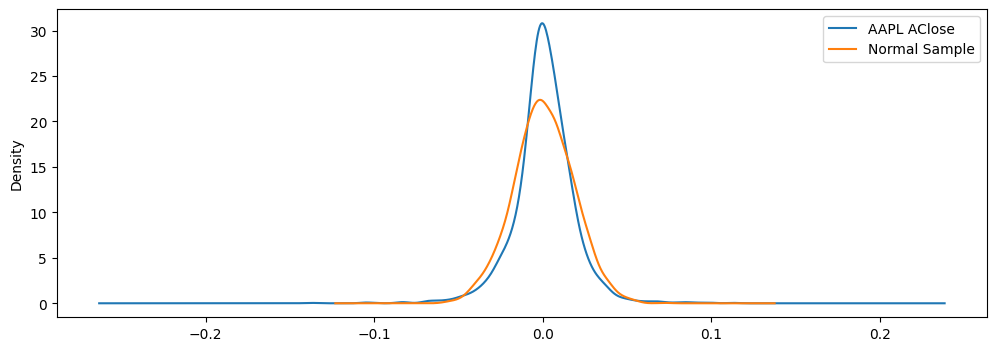

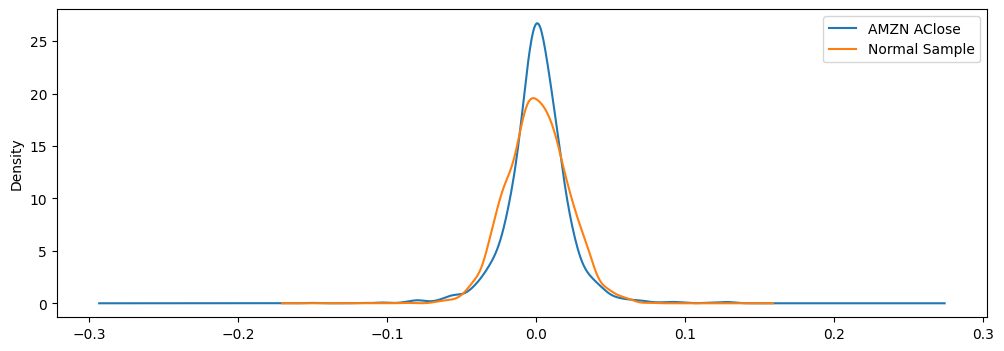

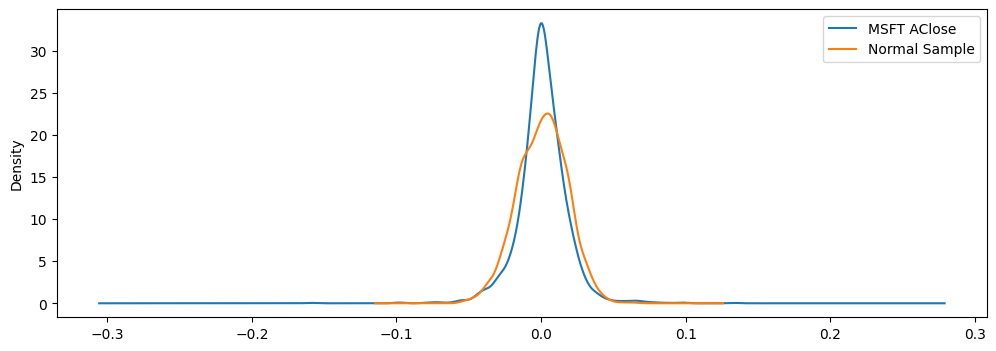

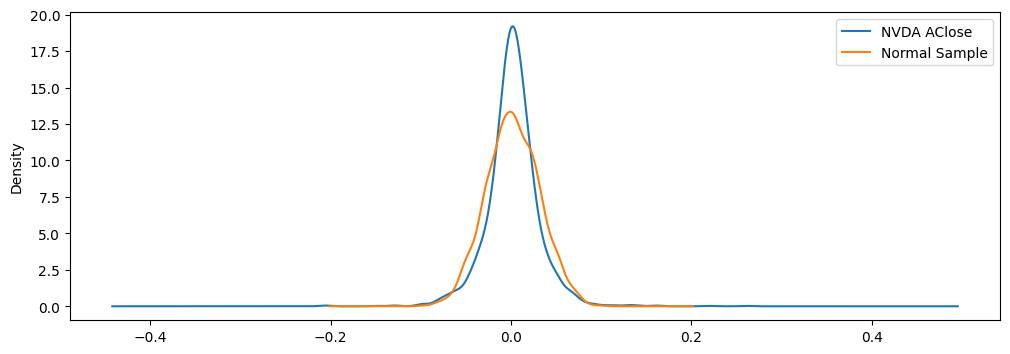

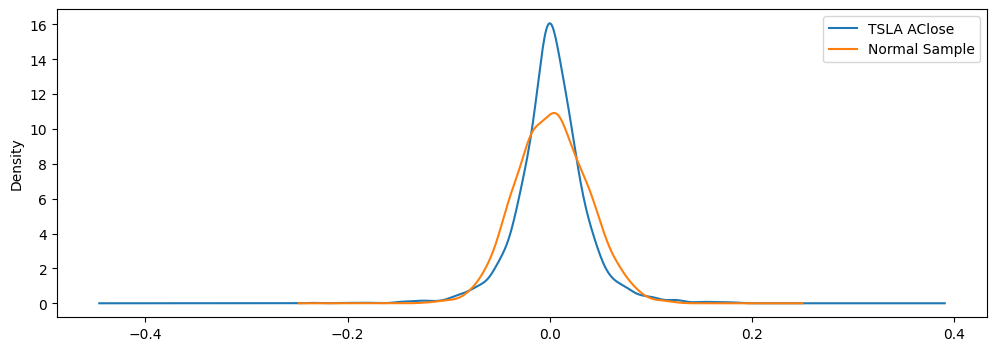

In [ ]:
 # Sampling from normal distribution
np.random.seed(28)
#figure

for i in stock_AClose.columns:
    normal_dist = stats.norm.rvs(size=len(stock_AClose[i]), loc=stock_AClose[i].mean(), scale=stock_AClose[i].std())
    # Creating an additional column in df in order to use the KDE plot functionality of pandas
    stock_AClose["Normal Sample"] = normal_dist
    # Plotting the KDE plots
    stock_AClose[[i, "Normal Sample"]].plot(kind="kde", figsize=(12,4))

In [ ]:
stock_AClose.kurt()

AAPL AClose      5.682837
AMZN AClose      6.115591
MSFT AClose      8.187453
NVDA AClose      8.049411
TSLA AClose      4.553571
Normal Sample   -0.006442
dtype: float64

The returns of the five stocks from the visuals seem to be leptokurtic. Indeed the statistics reveal the same as kurtosis is greater than 0.

###**References**

1. Fred. "Delinquency Rate on Credit Card Loans, Banks Ranked 1st to 100th Largest in Size by Assets (DRCCLT100S).", Nov 20, 2023, https://fred.stlouisfed.org/series/DRCCLT100S

2. Fred. "Delinquency Rate on Credit Card Loans, Banks Not Among the 100 Largest in Size by Assets (DRCCLOBS)." Nov 20, 2023, https://fred.stlouisfed.org/series/DRCCLOBS

3. Fred. "Delinquency Rate on Credit Card Loans, All Commercial Banks (DRCCLACBS)." Nov 20, 2023, https://fred.stlouisfed.org/series/DRCCLACBS

4. Fred. "Consumer Loans: Credit Cards and Other Revolving Plans, All Commercial Banks (CCLACBW027SBOG)." Jan 5, 2024, https://fred.stlouisfed.org/series/CCLACBW027SBOG

5. Fred. "Commercial Bank Interest Rate on Credit Card Plans, All Accounts (TERMCBCCALLNS)." Nov 2023, https://fred.stlouisfed.org/series/TERMCBCCALLNS

6. Nasdaq. "Get API Access to Quandl Data Right Now
Sample data is available for all Quandl databases" https://data.nasdaq.com/publishers/QDL